### Імпортуємо необхдіні пакети та бібліотеки

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

# Завдання
## 1. Збільшити датасет
1.1 Отримати список зображень у директорії "./assignemnts/dataset"

['image_0001.jpg', 'image_0002.jpg', 'image_0003.jpg', 'image_0004.jpg', 'image_0005.jpg', 'image_0006.jpg', 'image_0007.jpg', 'image_0008.jpg', 'image_0009.jpg', 'image_0010.jpg', 'test_img.jpg']


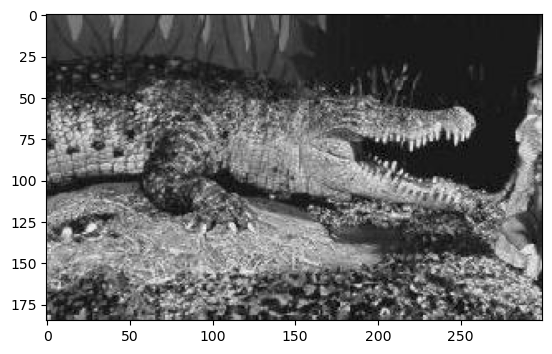

In [2]:
img_list = os.listdir("input")
print(img_list)

image = []
for i in range(len(img_list)):
    image.append(cv2.imread("input\\" + str(img_list[i]), cv2.IMREAD_GRAYSCALE))
              
img = image[1]
plt.imshow(img, cmap='gray')
plt.show();

1.2 Реалізувати функцію аугментації зображення шляхом комбінацій наступних перетворень:
* поелементне перетворення:<br>
  - інверсія яскравості пікселів
  - гамма корекція яскравості пікселів
* просторова фільтраці:
  - згладжування зображення
* геометричне перетворення:
  - перевернути зображення горизонтально/вертикально
  - переміщення зображення
  - обертання зображення
  - перекіс зображення

In [3]:
def foto(img, title = 'NONE'):
    return plt.imshow(img, cmap='gray'), plt.xticks([]), plt.yticks([]), plt.title(str(title))

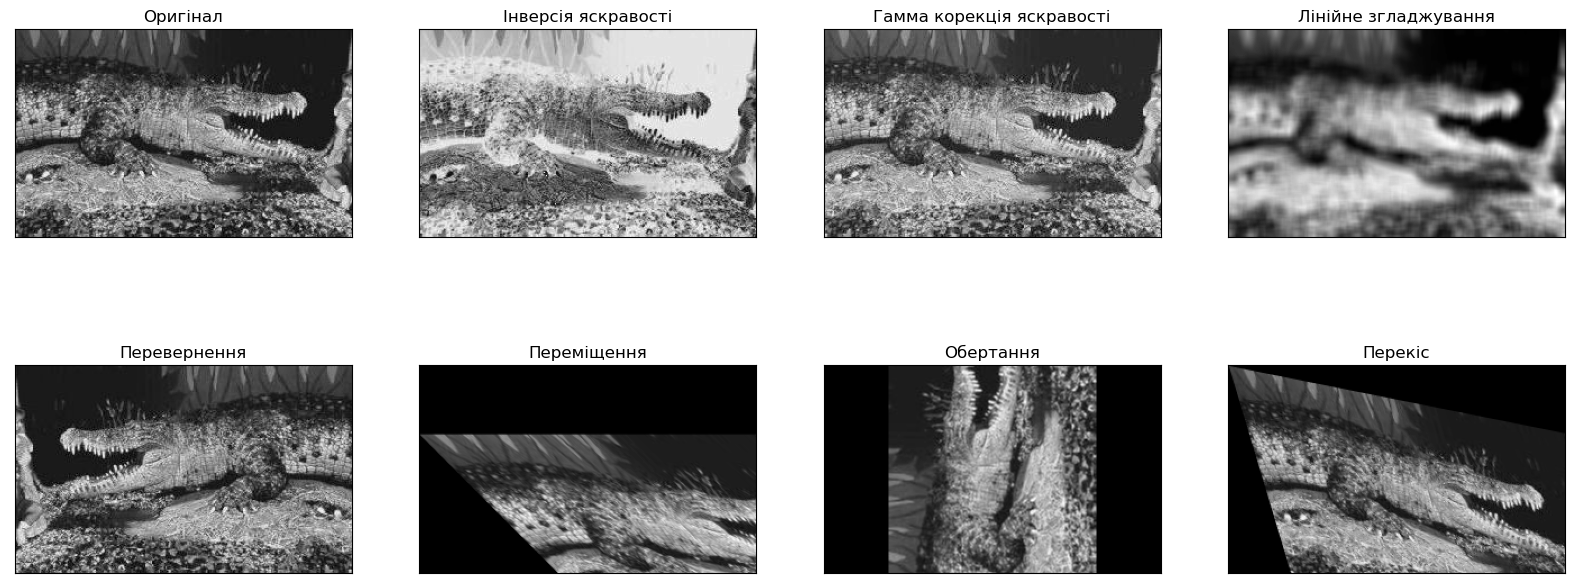

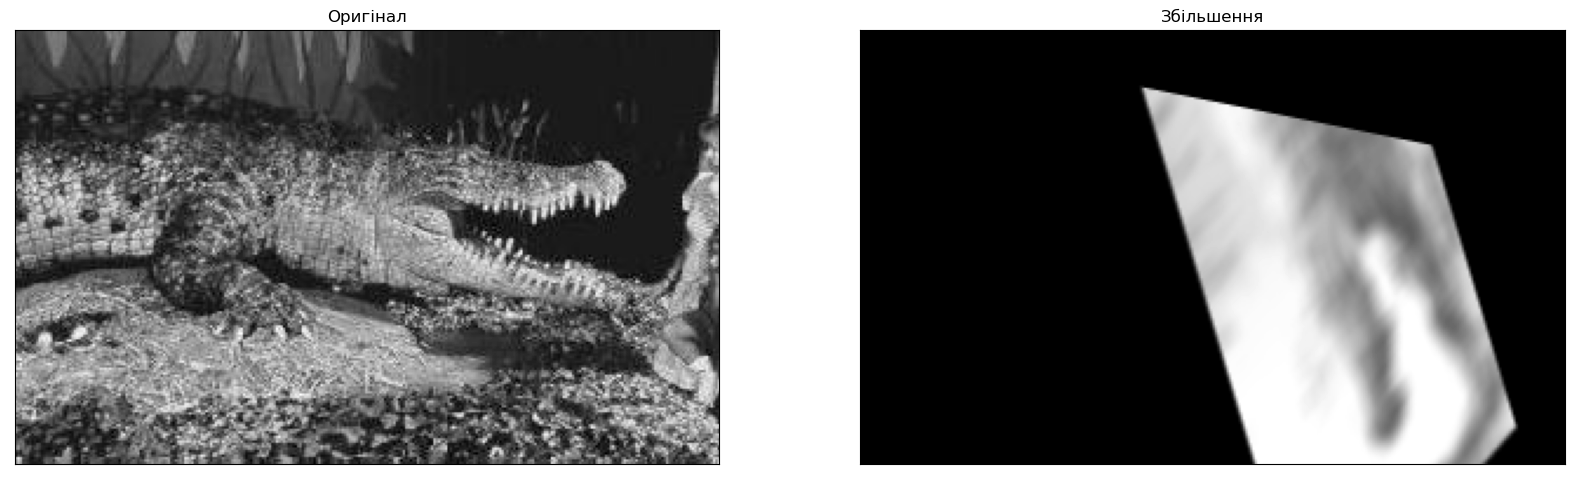

In [4]:
def brightness_inversion(img):     
    return np.iinfo('uint8').max - 1 -img

def gamma_correction(img, gamma = 0.8, c = 1):
    return (c * np.power(img, gamma) / np.max(c * np.power(img, gamma))*255).astype(np.uint8)

def linear_smoothing(img , n = 9):
    return cv2.filter2D(img, -1, np.ones((n,n),np.float32) / (n * n))

def turning_over(img,flipCode = 1):
    return cv2.flip(img, flipCode)

def moving(img, M = np.float32([[1, 1, 1], [0, 1, img.shape[0]/3]])):#переміщення moving - масив переміщення
    return cv2.warpAffine(img, M, (img.shape[1], img.shape[0]))

def rotate(img, angle = 90):
    return cv2.warpAffine(img, cv2.getRotationMatrix2D((img.shape[1]/2, img.shape[0]/2), angle, 1), (img.shape[1], img.shape[0]))

def skew(img, M = np.float32([[1,0.3,1], [0.2,1,1]])):
    return cv2.warpAffine(img, M, (img.shape[1], img.shape[0]))

def data_augmentation(img):
    return skew(rotate(moving(turning_over(linear_smoothing(gamma_correction(brightness_inversion(img)))))))

plt.figure(figsize=(20, 8))
plt.subplot(241), foto(img, "Оригінал")
plt.subplot(242), foto(brightness_inversion(img), "Інверсія яскравості")
plt.subplot(243), foto(gamma_correction(img),  "Гамма корекція яскравості")
plt.subplot(244), foto(linear_smoothing(img), "Лінійне згладжування")
plt.subplot(245), foto(turning_over(img), "Перевернення")
plt.subplot(246), foto(moving(img), "Переміщення")
plt.subplot(247), foto(rotate(img), "Обертання")
plt.subplot(248), foto(skew(img), "Перекіс")

plt.figure(figsize=(20, 8))
plt.subplot(121), foto(img, "Оригінал")
plt.subplot(122), foto(data_augmentation(img),"Збільшення")

plt.show();

1.3 Для кожного зображення зі списку **img_list**, використовуючи функцію **data_augmentation**, виконати 10 доповнень та зберегти результат у директорії "./assignemnts/dataset":

In [5]:
j = 0
for i in image:
    cv2.imwrite("output\image_data_augmentation_" + str(j) + ".png",  data_augmentation(i))
    j+=1

## 2. Зробити перетворення перспективи вхідного зображення для визначення меж дорожньої розмітки

2.1. Відкрити та завантажити наступне зображення:
  .../test_img.jpg

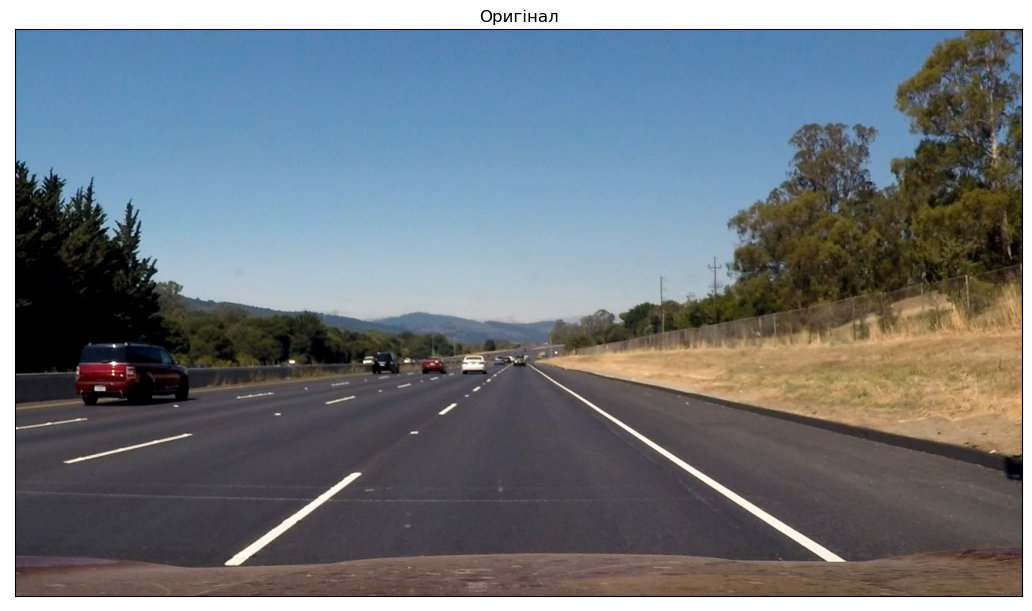

width :1280
height :720


In [6]:
img = cv2.cvtColor(cv2.imread("input/test_img.jpg"), cv2.COLOR_BGR2RGB)

height = img.shape[0]
width = img.shape[1]

plt.figure(figsize=(13, 8))
foto(img, "Оригінал")
plt.show()

print("width :" + str(width) + "\nheight :" + str(height))

2.2 Задати розмір вихідного зображення:

In [7]:
OUT_IMG_WIDTH = 800
OUT_IMG_HEIGHT = 1200

2.3 Задати координати ROI вхідного зображення: 

2.4 Задати координати ROI вихідного зображення: 

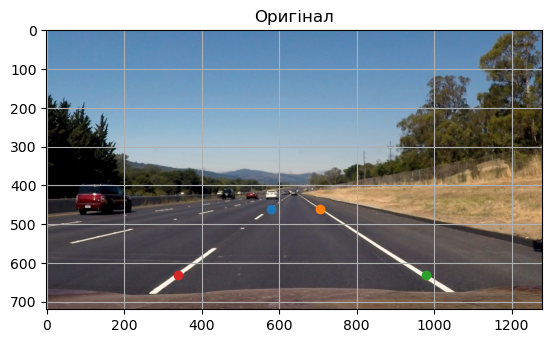

In [8]:
t1 = ([580, 460])
t2 = ([705, 460])
t3 = ([980, 630])
t4 = ([340, 630])

src = np.float32([t1, t2, t3, t4])
dst = np.float32([[0, 0], [OUT_IMG_WIDTH, 0], [OUT_IMG_WIDTH, OUT_IMG_HEIGHT], [0, OUT_IMG_HEIGHT]])


plt.imshow(img), plt.title("Оригінал"), plt.grid()
plt.scatter(t1[0],t1[1])
plt.scatter(t2[0],t2[1])
plt.scatter(t3[0],t3[1])
plt.scatter(t4[0],t4[1])

plt.show()

2.5 Визначити матрицю перетворення перспективи

In [9]:
M = cv2.getPerspectiveTransform(src, dst)
print(M)

[[-6.30651519e-01 -8.90331556e-01  7.75330396e+02]
 [ 1.39208373e-15 -3.56132622e+00  1.63821006e+03]
 [ 1.38347232e-18 -2.38812891e-03  1.00000000e+00]]


2.6 Виконати перетворення перспективи

In [10]:
wraped_img = cv2.warpPerspective(img, M, (OUT_IMG_WIDTH,OUT_IMG_HEIGHT))

2.7 Відобразити вихідне зображення

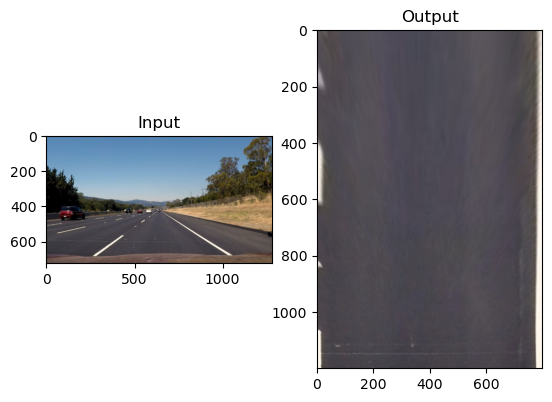

In [11]:
plt.subplot(121), plt.imshow(img), plt.title('Input')
plt.subplot(122), plt.imshow(wraped_img),plt.title('Output')
plt.show()

### 3*. Реалізувати геометричне перетворення зображеннь (не використовуючи функції OpenCV)
Перетворення координат:
* афінне перетворення*
* перетворення перспективи

Інтерполяція яскравості пікселів:
* методом найближчого сусіда
* білінійна інтерполяція**
* бікубічна інтерполяція***

## Перетворення координат

### Афінне перетворення

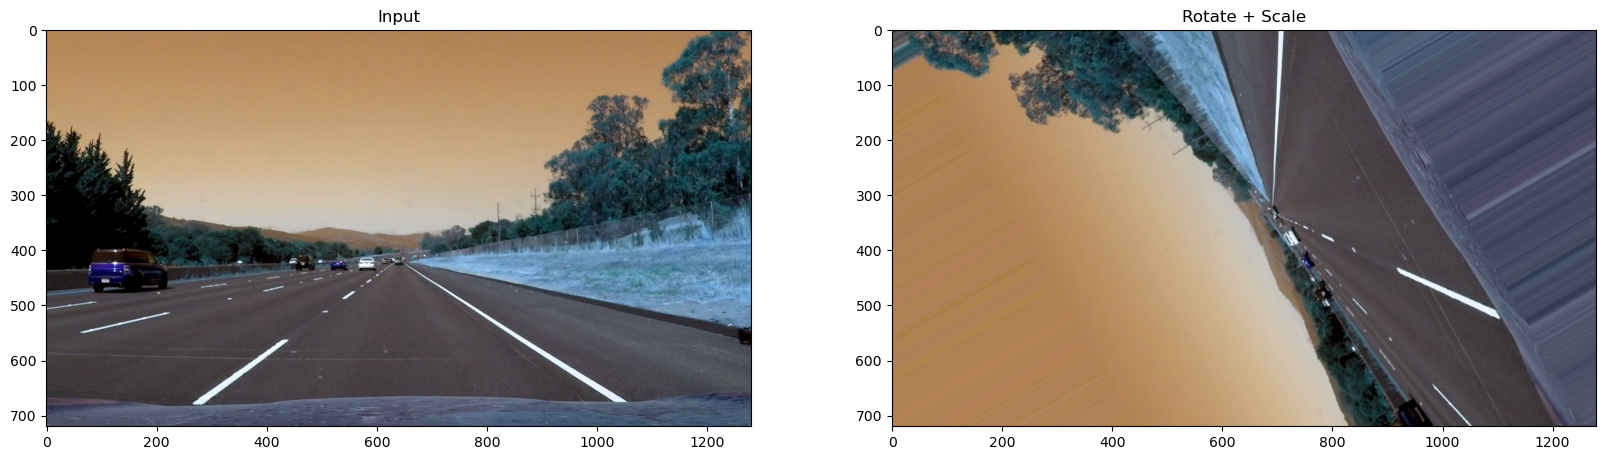

In [12]:
from tensorflow.keras.preprocessing.image import apply_affine_transform

img = cv2.imread("input/test_img.jpg")

apply_affine_transform(
    x = img,
    theta=0,
    tx=0,
    ty=0,
    shear=0,
    zx=1,
    zy=1,
    row_axis=0,
    col_axis=1,
    channel_axis=2,
    fill_mode='nearest',
    cval=0.0,
    order=1)

transformation = apply_affine_transform(img, theta=240, tx=0.5, ty= 0.7)

plt.figure(figsize=(20, 8))
plt.subplot(121), plt.imshow(img), plt.title('Input')
plt.subplot(122), plt.imshow(transformation), plt.title('Rotate + Scale')
plt.show()

### Методом найближчого сусіда


In [13]:

from math import floor

#----------------------------------
# Euclidian Distance
#==================================
def euclidian_dist(a,b):
    '''
    Euclidian distance between 2 points a(x_a, y_a) and b(x_b, y_b)
    Distance = Square Root ( (x_a - x_b)^2 +  (y_a - y_b)^2 )
    '''
    return np.sqrt(((a[0]-b[0])**2)+((a[1]-b[1])**2))

#----------------------------------
# Nearest Neighbour
#==================================
def near_neighbour(X,P):
    '''
    The nearest neighbour of point X(x,y) to the centroid P(x_p, y_p)
    The Neighbourhood is defined by the Upper-Left corner of the point X, which means 3 neighbours and the point X. 
    '''
    i,j = X[0],X[1]
    A = [[i,j],[i,j+1],[i+1,j],[i+1,j+1]]
    dist = [euclidian_dist(A[0],P),euclidian_dist(A[1],P),euclidian_dist(A[2],P),euclidian_dist(A[3],P)]
    minpos = dist.index(min(dist))
    return A[minpos]        

#----------------------------------
# Nearest Neighbour Interpolation
#==================================
def NN_interpolation(image, scale):
    '''
    Interpolation of the image im with scale factor scale_factor, using Nearest Neighbour.
    '''
    row, col = image.shape[0], image.shape[1]
    n_row, n_col = int(scale * row), int(scale * col)
    # fill in  img
    zoom = np.arange(n_row*n_col).reshape(n_row,n_col)
    for i in range(n_row):
        for j in range(n_col):
            P = [floor(float(i)/scale),floor(float(j)/scale)]
            X = [int(i) for i in P]
            zoom[i][j] = image[near_neighbour(X,P)[0]][near_neighbour(X,P)[1]]
    return zoom

def info(image, scale):
    row, col = image.shape[0], image.shape[1]
    n_row, n_col = int(scale * row), int(scale * col)
    zoom = np.arange(n_row*n_col).reshape(n_row,n_col)
    print("image size: ", image.shape, "zoom image size:", zoom.shape)

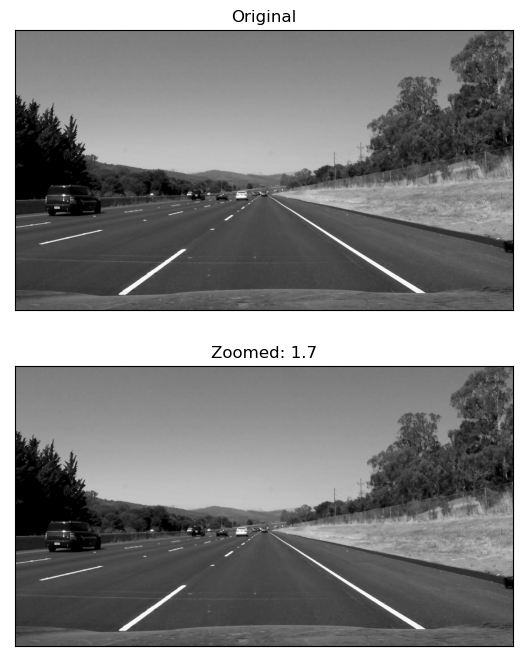

image size:  (720, 1280) zoom image size: (1800, 3200)


In [14]:
img = cv2.imread('input/test_img.jpg', cv2.IMREAD_GRAYSCALE)

scale = 1.7
Zoomed_more = NN_interpolation(img, scale)

plt.figure(figsize=(13, 8))
plt.subplot(211), foto(img, 'Original')
plt.subplot(212), foto(Zoomed_more, 'Zoomed: ' + str(scale))
plt.show()

info(img, 2.5)

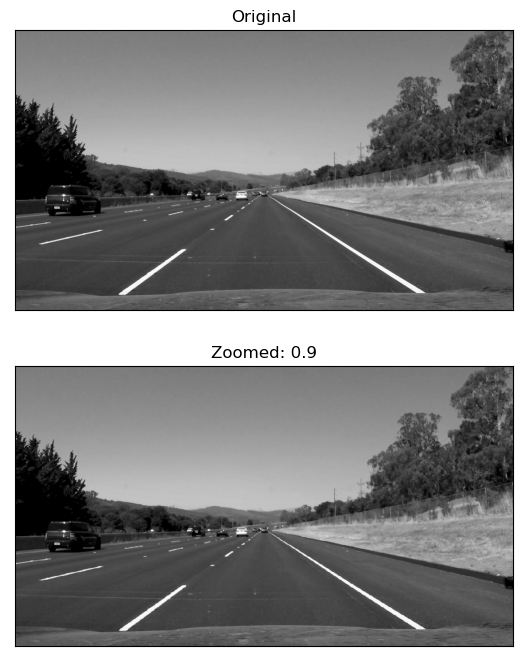

image size:  (720, 1280) zoom image size: (648, 1152)


In [19]:
scale = 0.9
Zoomed_less = NN_interpolation(img, scale)

plt.figure(figsize=(13, 8))
plt.subplot(211), foto(img, 'Original')
plt.subplot(212), foto(Zoomed_less, 'Zoomed: ' + str(scale))
plt.show()

info(img, scale)